In [90]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# from dataprep.eda import plot, plot_correlation, plot_missing

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [91]:
import os
path = os.path.dirname(os.getcwd())
path = os.path.join(path, "ProcessedData")
train = pd.read_csv(os.path.join(path,"merged_train.csv"))
test = pd.read_csv(os.path.join(path,"merged_test.csv"))

In [92]:
train["세대수별주차면수"] = train["단지내주차면수"]/train["총세대수"]
train["보증금당임대료"] = train["임대료"]/train["임대보증금"]

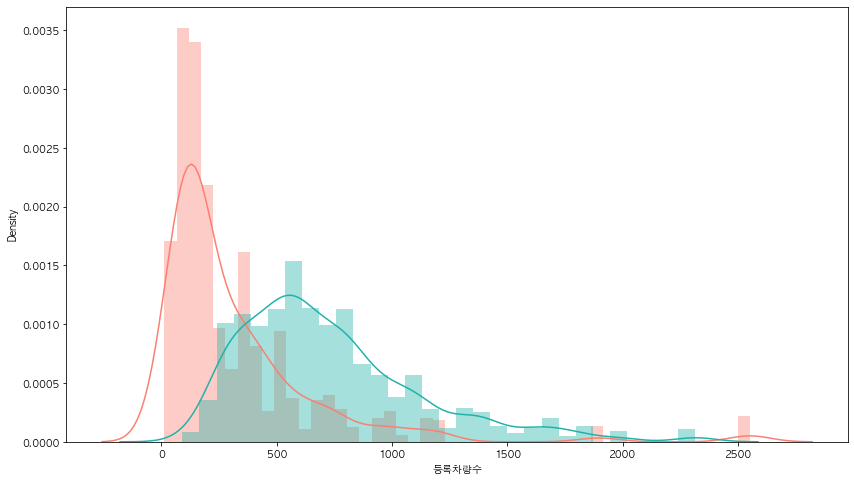

In [116]:
plt.rcParams["figure.figsize"] = (14,8)
sns.distplot(train.등록차량수[train.세대수별주차면수<train.세대수별주차면수[np.argmin(ee2)]], color="salmon")
sns.distplot(train.등록차량수[train.세대수별주차면수>=train.세대수별주차면수[np.argmin(ee2)]], color="lightseagreen")
plt.show()

In [115]:
pd.get_dummies(train[["임대건물구분"]])

,임대건물구분_상가,임대건물구분_아파트
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2891,1,0
2892,1,0
2893,1,0
2894,1,0


In [ ]:
train.groupby("단지코드")

In [93]:
danji = train[["단지코드","단지내주차면수","등록차량수","총세대수"]].drop_duplicates().reset_index(drop=True)
danji["세대수별주차면수"] = danji["단지내주차면수"]/danji["총세대수"]
danji

,단지코드,단지내주차면수,등록차량수,총세대수,세대수별주차면수
0,C2515,624.0000,205.0000,545,1.1450
1,C1407,"1,285.0000","1,064.0000",1216,1.0567
2,C1945,734.0000,730.0000,755,0.9722
3,C1470,645.0000,553.0000,696,0.9267
4,C1898,517.0000,415.0000,566,0.9134
...,...,...,...,...,...
409,C2586,66.0000,57.0000,90,0.7333
410,C2035,521.0000,246.0000,492,1.0589
411,C2020,25.0000,19.0000,40,0.6250
412,C2437,30.0000,16.0000,90,0.3333


In [94]:
danjis = danji.sort_values(by="세대수별주차면수").reset_index(drop=True)
danjis

,단지코드,단지내주차면수,등록차량수,총세대수,세대수별주차면수
0,C2310,217.0000,189.0000,1988,0.1092
1,C1206,88.0000,90.0000,755,0.1166
2,C2571,65.0000,62.0000,481,0.1351
3,C1439,270.0000,172.0000,1755,0.1538
4,C1874,97.0000,62.0000,619,0.1567
...,...,...,...,...,...
409,C1804,629.0000,951.0000,478,1.3159
410,C1036,"1,016.0000","1,279.0000",742,1.3693
411,C2259,"1,306.0000","1,378.0000",947,1.3791
412,C1697,727.0000,854.0000,526,1.3821


In [95]:
danjis.describe()

,단지내주차면수,등록차량수,총세대수,세대수별주차면수
count,414.0000,414.0000,414.0000,414.0000
mean,586.3309,570.1039,724.6691,0.8163
std,363.6656,391.5858,407.8050,0.2418
min,13.0000,13.0000,26.0000,0.1092
25%,318.2500,289.2500,450.2500,0.7186
50%,517.0000,505.0000,633.5000,0.8499
75%,785.7500,760.0000,923.5000,0.9528
max,"1,798.0000","2,550.0000","2,568.0000",1.5449


In [96]:
ee2 = []
for idx,i in enumerate (danjis.세대수별주차면수):
    ee2.append(np.var(danjis.loc[:idx,"등록차량수"])*idx+ np.var(danjis.loc[idx:,"등록차량수"])*(len(danjis)-idx))

In [141]:
danjis[danjis.세대수별주차면수<0.8304195804195804].shape, danjis[danjis.세대수별주차면수>=0.8304195804195804].shape

((190, 5), (224, 5))

In [138]:
danjis.세대수별주차면수[np.argmin(ee2)]

0.8304195804195804

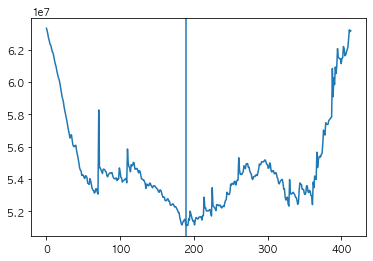

In [98]:
plt.plot(ee2)
plt.axvline(x=np.argmin(ee2))
plt.show()

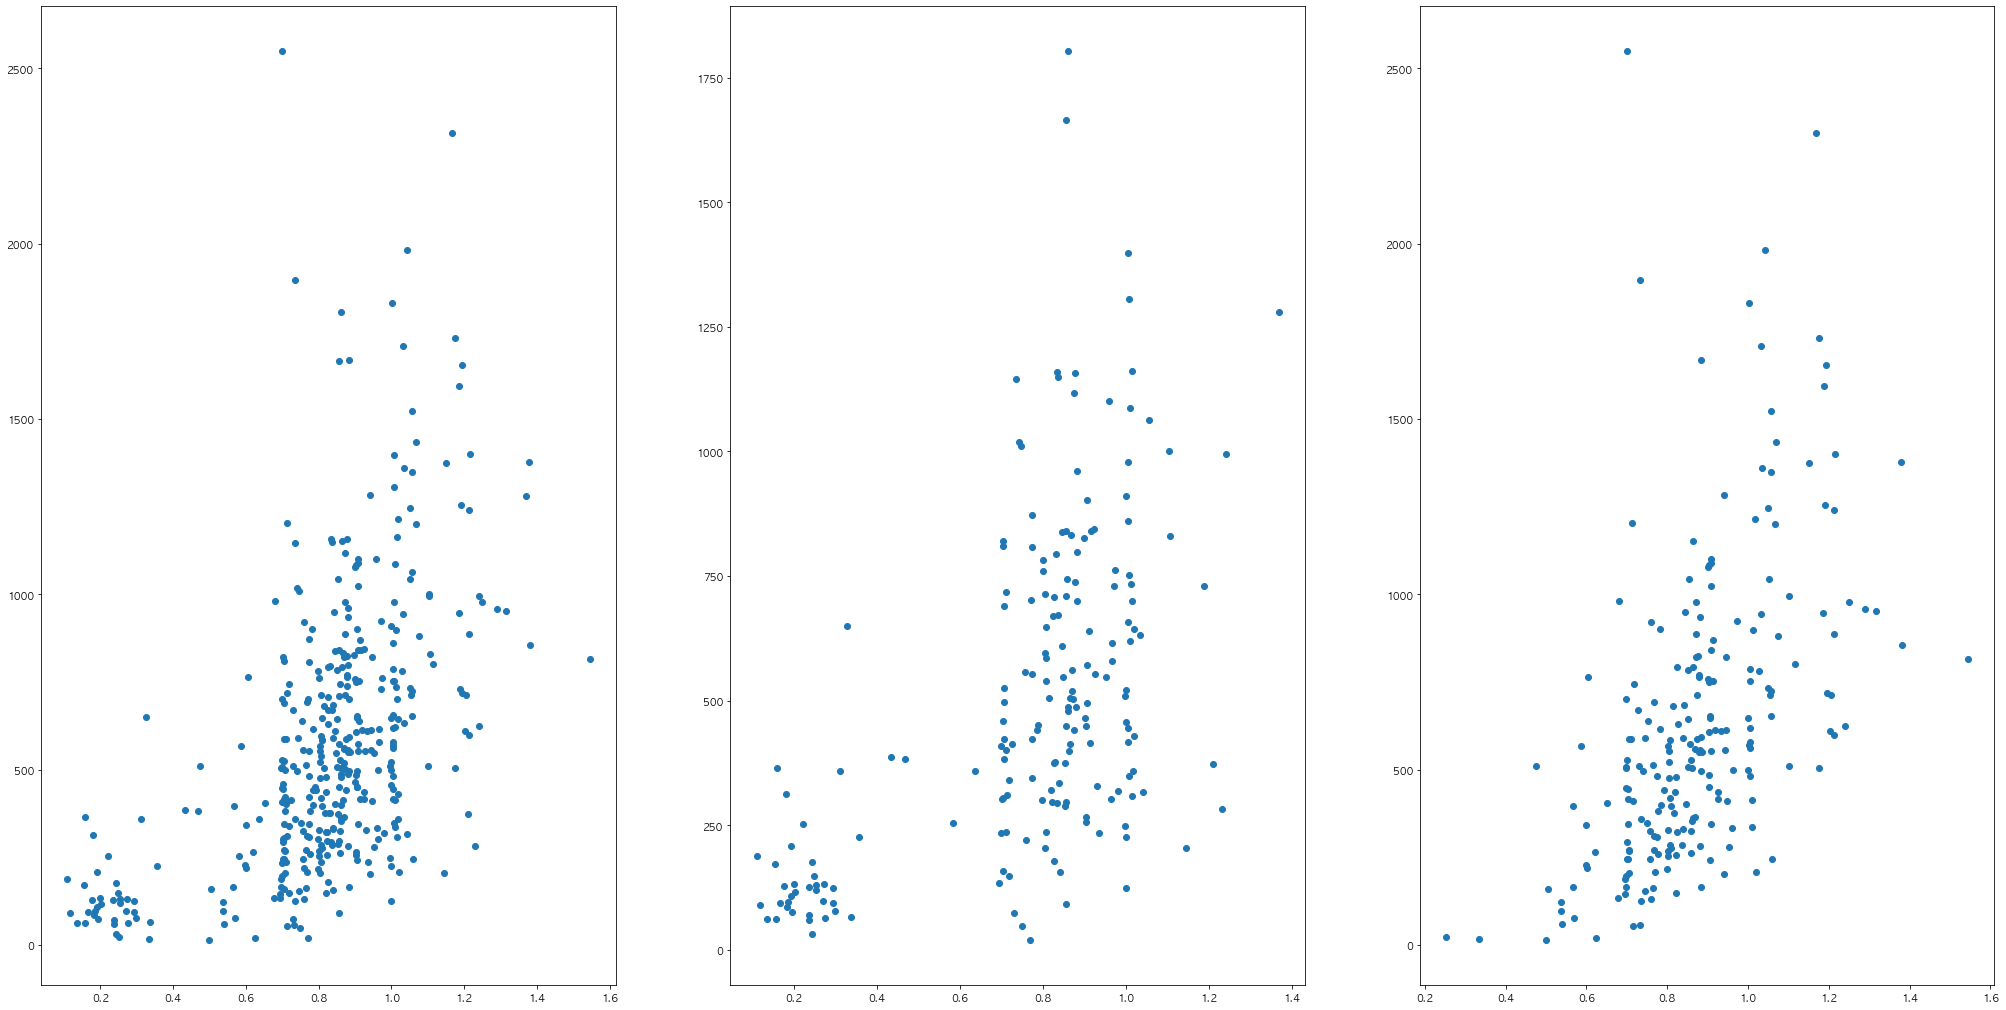

In [99]:
danjis1 = danji[:np.argmin(ee2)]
danjis2= danji[np.argmin(ee2):]
fig= plt.figure(figsize=(35,18))
plt.subplot(1,3,1)
plt.scatter(danjis.세대수별주차면수,danjis.등록차량수)
plt.subplot(1,3,2)
plt.scatter(danjis1.세대수별주차면수,danjis1.등록차량수)
plt.subplot(1,3,3)
plt.scatter(danjis2.세대수별주차면수,danjis2.등록차량수)
plt.show()


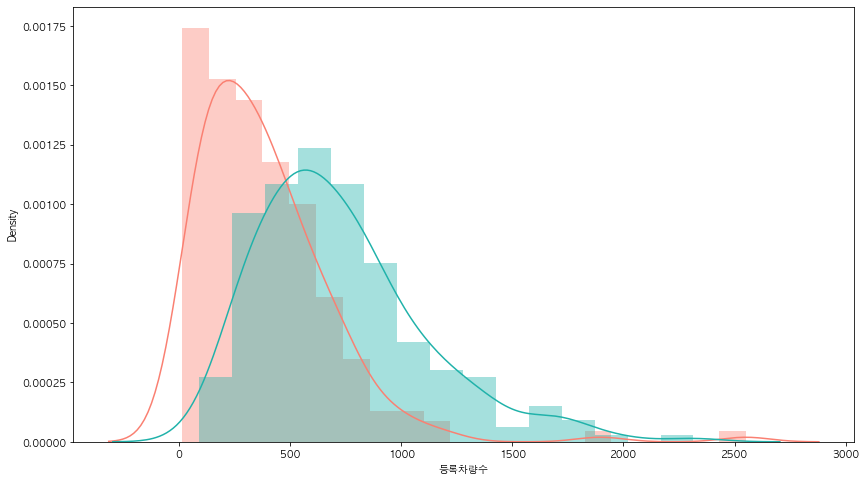

In [100]:
plt.rcParams["figure.figsize"] = (14,8)
sns.distplot(danjis.등록차량수[danjis.세대수별주차면수<danjis.세대수별주차면수[np.argmin(ee2)]], color="salmon")
sns.distplot(danjis.등록차량수[danjis.세대수별주차면수>=danjis.세대수별주차면수[np.argmin(ee2)]], color="lightseagreen")
plt.show()

In [120]:
train.공급유형.unique()

array(['국민임대', '공공임대(50년)', '영구임대', '공공임대(10년)', '공공임대(분납)', '장기전세',
       '공공분양', '행복주택', '공공임대(5년)', '임대상가'], dtype=object)

In [135]:
ttmmp = train[["단지코드","공급유형","등록차량수","세대수별주차면수"]].drop_duplicates()

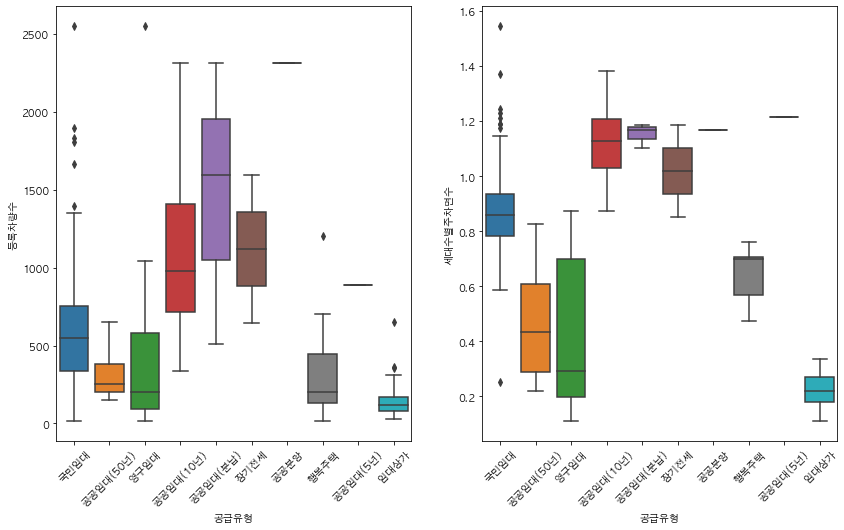

In [136]:
plt.subplot(1,2,1)
sns.boxplot(ttmmp.공급유형,ttmmp.등록차량수)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(ttmmp.공급유형,ttmmp.세대수별주차면수)
plt.xticks(rotation=45)
plt.show()

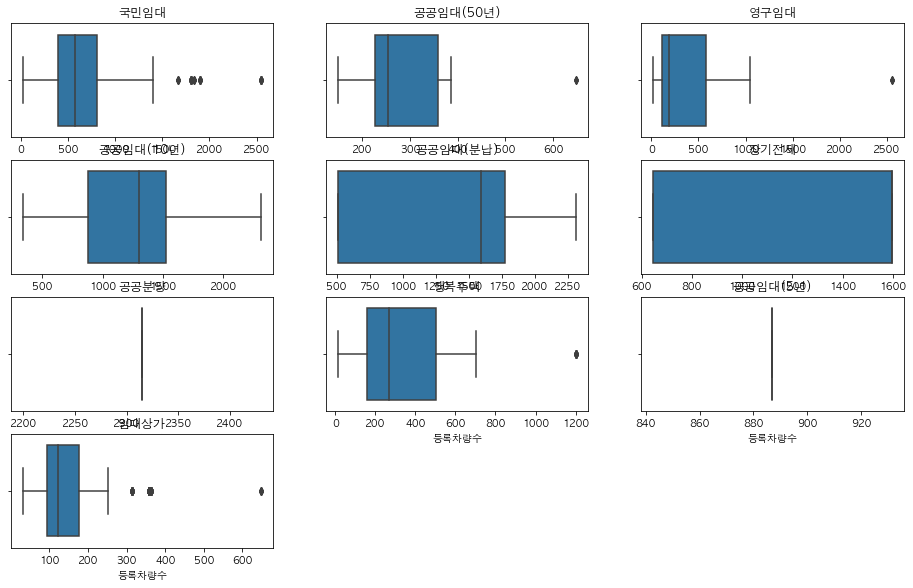

In [123]:
plt.figure(figsize=(16,60))
for i,r in enumerate(train.공급유형.unique()):
    plt.subplot(24,3,i+1)
    sns.boxplot(train.등록차량수[train.공급유형 == r])
    plt.title(r)

In [102]:
tmp = train.groupby("단지코드").mean().reset_index()[["단지코드","보증금당임대료"]]
danjiss = pd.merge(danjis,tmp,on = "단지코드")

In [103]:
tmp2 = train[train.임대건물구분 == "아파트"].groupby("단지코드").mean().reset_index()[["단지코드","보증금당임대료"]]
danjisss = pd.merge(danjis,tmp2,on = "단지코드")

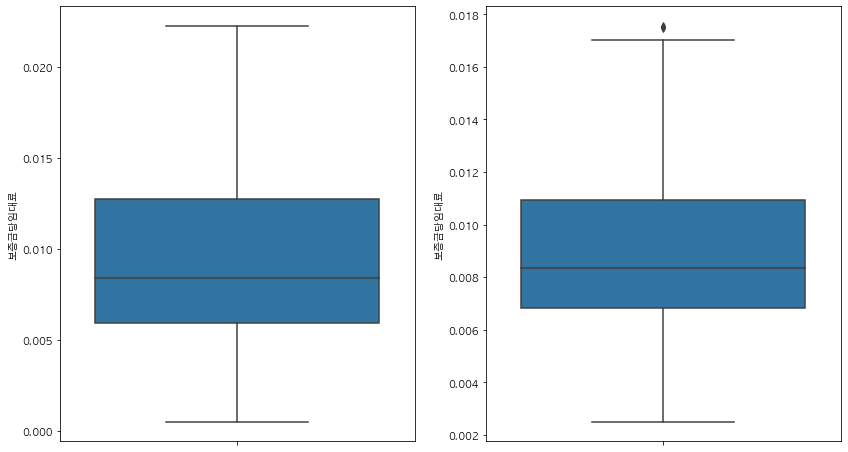

In [109]:
plt.subplot(1,2,1)
sns.boxplot(y = danjisss.보증금당임대료[danjisss.세대수별주차면수<danjisss.세대수별주차면수[np.argmin(ee2)]])
plt.subplot(1,2,2)
sns.boxplot(y = danjisss.보증금당임대료[danjisss.세대수별주차면수>=danjisss.세대수별주차면수[np.argmin(ee2)]])
plt.show()